# Perceptrón Multicapa para Clasificación de Tumores

## Descripción de las funciones por utilizar
A continuación, se describen las funciones utilizadas en el código:
- `train_test_split(X, y, test_size=0.2, random_state=42)`: Divide el conjunto de datos en entrenamiento y prueba.
- `StandardScaler().fit_transform(X_train)`: Normaliza las características para que tengan media 0 y varianza 1.
- `MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=42)`: Define un perceptrón multicapa con una capa oculta de 10 neuronas y función de activación ReLU.
- `mlp.fit(X_train, y_train)`: Entrena la red neuronal con los datos de entrenamiento.
- `mlp.predict(X_test)`: Predice las etiquetas de los datos de prueba.
- `accuracy_score(y_test, y_pred)`: Calcula la precisión del modelo.
- `confusion_matrix(y_test, y_pred)`: Genera la matriz de confusión.
- `classification_report(y_test, y_pred)`: Muestra métricas detalladas del desempeño del modelo.




## Carga y Preprocesamiento de Datos
El conjunto de datos utilizado es el `Breast Cancer Wisconsin Dataset`, que contiene características extraídas de imágenes digitales de células tumorales, clasificadas en benignas o malignas.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

# Cargar el dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

## Descripción del Data Set
El conjunto de datos utilizado es el `Breast Cancer Wisconsin Dataset`, que contiene características extraídas de imágenes digitales de células tumorales, clasificadas en benignas o malignas. Cada fila representa un tumor y cada columna es una característica que describe el tumor.

In [18]:
# Mostrar las primeras filas del dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Visualización de Datos: Pair-Plot y Heatmap
Realizamos un análisis exploratorio con gráficos para entender mejor la relación entre las variables.

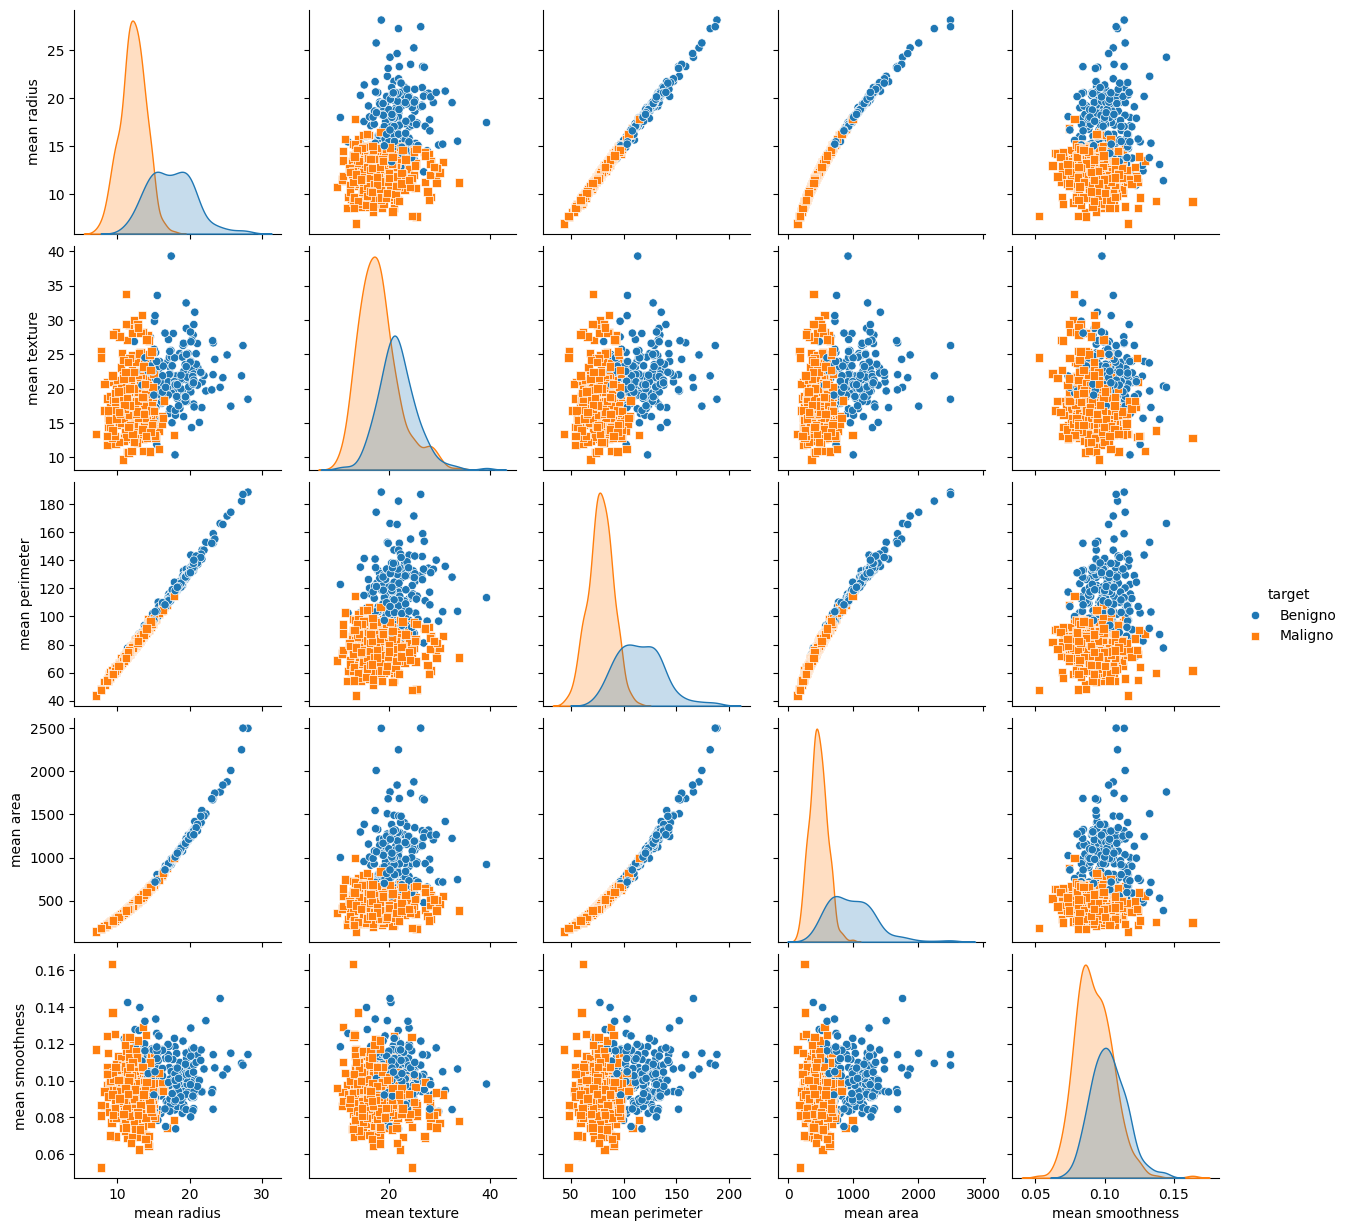

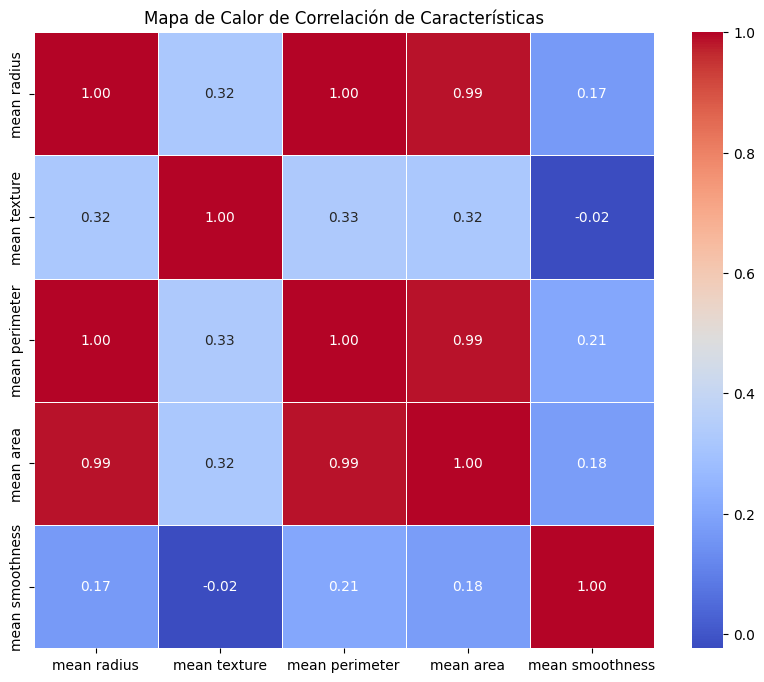

In [20]:
# Seleccionar un subconjunto de características
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
df_selected = df[selected_features + ['target']].copy()
df_selected['target'] = df_selected['target'].map({0: 'Benigno', 1: 'Maligno'})

# Pair plot
sns.pairplot(df_selected, hue='target', diag_kind='kde', markers=['o', 's'])
plt.show()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlación de Características')
plt.show()

## Entrenamiento del Modelo: Perceptrón Multicapa
Entrenamos un Perceptrón Multicapa (MLP) para la clasificación de tumores.

Las funciones de activación más comunes incluyen:
- **ReLU**: $f(x) = \max(0, x)$
- **Sigmoide**: $f(x) = \frac{1}{1 + e^{-x}}$
- **Tangente hiperbólica**: $f(x) = \tanh(x)$

In [21]:
# División del conjunto de datos
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir la arquitectura del MLP
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

### Parámetro solver en MLPClassifier

El parámetro `solver` determina el algoritmo de optimización utilizado para entrenar la red neuronal.

| Valor     | Descripción                                                                                                     | ¿Cuándo usarlo?                                                                 |
|-----------|-----------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| `lbfgs`   | Optimizador basado en el método quasi-Newton (BFGS). Es determinista y converge rápidamente en datasets pequeños. | Cuando tienes un conjunto de datos **pequeño** y buscas una **alta precisión**. |
| `sgd`     | Gradiente descendente estocástico. Requiere ajuste fino de hiperparámetros como tasa de aprendizaje y momentum. | Cuando deseas tener **control total** sobre el entrenamiento y tuning fino.     |
| `adam`    | Optimización adaptativa basada en momentos. Combina ventajas de AdaGrad y RMSProp.                             | **Opción recomendada por defecto**, útil para la mayoría de los problemas.      |


## Evaluación del Modelo
### Matriz de Confusión
Visualizamos la matriz de confusión para evaluar el rendimiento del modelo en la clasificación de tumores.

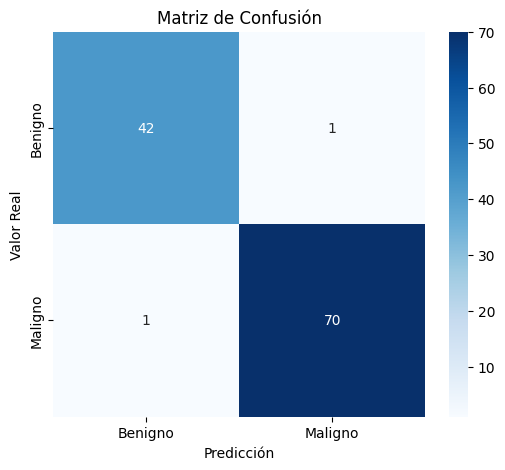

In [26]:
# Mostrar matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

## Evaluación del Modelo
Después del entrenamiento del modelo, evaluamos su rendimiento utilizando precisión, matriz de confusión y un informe de clasificación.

In [7]:
# Cálculo de la precisión y reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.4f}')
print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9825

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### 📐 Descripción de las Métricas del Reporte de Clasificación

| Métrica       | Fórmula                                        | Descripción                                                                                                                                         |
|---------------|------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| **precision** | `TP / (TP + FP)`                               | Proporción de instancias predichas como positivas que realmente son positivas. Mide la exactitud de las predicciones positivas.                    |
| **recall**    | `TP / (TP + FN)`                               | Proporción de instancias positivas que fueron correctamente identificadas por el modelo. También conocida como **sensibilidad** o **tasa de VP**.  |
| **f1-score**  | `2 * (precision * recall) / (precision + recall)` | Media armónica entre `precision` y `recall`. Útil cuando se necesita un balance entre ambas métricas.                                              |
| **support**   | *(conteo)*                                     | Número total de ejemplos verdaderos de la clase en el conjunto de prueba. No es una métrica, sino una referencia de cuántos datos tiene cada clase. |


### Interpretación del Reporte de Clasificación en una Tarea de Machine Learning

Cuando se realiza una tarea de clasificación con `scikit-learn`, se puede generar un reporte de desempeño utilizando:

```python
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


## Clasificación de Nuevos Casos
Creamos una función que permite clasificar nuevos tumores con base en sus características.

In [24]:
def clasificar_nuevo_patron(caracteristicas):
    """
    Clasifica un nuevo tumor con base en sus características.
    
    Parámetros:
    caracteristicas (array): Vector con las características del tumor.
    
    Retorna:
    str: 'Maligno' o 'Benigno'
    """
    caracteristicas = np.array(caracteristicas).reshape(1, -1)
    caracteristicas = scaler.transform(caracteristicas)
    prediccion = mlp.predict(caracteristicas)
    return 'Maligno' if prediccion[0] == 1 else 'Benigno'

### Prueba de Clasificación con un Nuevo Tumor
Utilizamos un ejemplo real del conjunto de prueba para demostrar que el modelo funciona correctamente.

In [31]:
# Tomar un ejemplo del conjunto de prueba y clasificarlo
nuevo_patron = X_test[3]
resultado = clasificar_nuevo_patron(nuevo_patron)
print(f'Clasificación del nuevo patrón: {resultado}')

Clasificación del nuevo patrón: Maligno
